<a href="https://colab.research.google.com/github/ReidelVichot/DE_ASCENT/blob/main/OnTheMap_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
fname = "https://raw.githubusercontent.com/ReidelVichot/DE_ASCENT/main/OnTheMapData.csv"
df = pd.read_csv(fname, parse_dates=["year"])

In [87]:
df[df["area"] == "work"]

,area,year,type,Total All Jobs,Age 29 or younger,Age 30 to 54,Age 55 or older,"$1,250 per month or less","$1,251 to $3,333 per month","More than $3,333 per month",...,Two or More Race Groups,Not Hispanic or Latino,Hispanic or Latino,Less than high school,"High school or equivalent, no college",Some college or Associate degree,Bachelor's degree or advanced degree,Educational attainment not available (workers aged 29 or younger),Male,Female
0,work,2020-01-01,Count,28894,5280.000000,16212.000000,7402.000000,5085.000000,6945.000000,16864.000000,...,479.000000,26306.000000,2588.000000,2906.000000,6345.000000,7211.000000,7152.000000,5280.000000,15313.000000,13581.000000
1,work,2020-01-01,Share,1,0.182737,0.561085,0.256178,0.175988,0.240361,0.583651,...,0.016578,0.910431,0.089569,0.100575,0.219596,0.249567,0.247525,0.182737,0.529972,0.470028
2,work,2019-01-01,Count,30261,5844.000000,16862.000000,7555.000000,5646.000000,8439.000000,16176.000000,...,474.000000,27723.000000,2538.000000,3072.000000,6649.000000,7700.000000,6996.000000,5844.000000,16033.000000,14228.000000
3,work,2019-01-01,Share,1,0.193120,0.557219,0.249661,0.186577,0.278874,0.534549,...,0.015664,0.916130,0.083870,0.101517,0.219722,0.254453,0.231189,0.193120,0.529824,0.470176
4,work,2018-01-01,Count,32621,6096.000000,18246.000000,8279.000000,5754.000000,9797.000000,17070.000000,...,519.000000,30012.000000,2609.000000,3197.000000,6950.000000,8397.000000,7981.000000,6096.000000,16884.000000,15737.000000
5,work,2018-01-01,Share,1,0.186873,0.559333,0.253794,0.176389,0.300328,0.523283,...,0.015910,0.920021,0.079979,0.098004,0.213053,0.257411,0.244658,0.186873,0.517581,0.482419
6,work,2017-01-01,Count,33082,5960.000000,18829.000000,8293.000000,6058.000000,10341.000000,16683.000000,...,489.000000,30663.000000,2419.000000,3104.000000,7333.000000,8613.000000,8072.000000,5960.000000,17449.000000,15633.000000
7,work,2017-01-01,Share,1,0.180158,0.569161,0.250680,0.183121,0.312587,0.504292,...,0.014781,0.926879,0.073121,0.093827,0.221661,0.260353,0.244000,0.180158,0.527447,0.472553
8,work,2016-01-01,Count,32523,5761.000000,18666.000000,8096.000000,5769.000000,9620.000000,17134.000000,...,505.000000,30182.000000,2341.000000,2865.000000,7244.000000,8610.000000,8043.000000,5761.000000,17066.000000,15457.000000
9,work,2016-01-01,Share,1,0.177136,0.573932,0.248932,0.177382,0.295791,0.526827,...,0.015527,0.928020,0.071980,0.088092,0.222735,0.264736,0.247302,0.177136,0.524736,0.475264


In [88]:
work = df[df["area"] == "work"]
home = df[df["area"] == "home"]
work_count = work[work["type"] == "Count"]
work_share = work[work["type"] == "Share"]
home_count = home[home["type"] == "Count"]
home_share = home[home["type"] == "Share"]

In [89]:
df.columns

Index(['area', 'year', 'type', 'Total All Jobs', 'Age 29 or younger',
       'Age 30 to 54', 'Age 55 or older', '$1,250 per month or less',
       '$1,251 to $3,333 per month', 'More than $3,333 per month',
       'Agriculture, Forestry, Fishing and Hunting',
       'Mining, Quarrying, and Oil and Gas Extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises',
       'Administration & Support, Waste Management and Remediation',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (excluding Public Administration)',
       'Public Administration', 'White Alone',
       'Black or African Ameri

In [90]:
df.dtypes

area                                                                         object
year                                                                 datetime64[ns]
type                                                                         object
Total All Jobs                                                                int64
Age 29 or younger                                                           float64
Age 30 to 54                                                                float64
Age 55 or older                                                             float64
$1,250 per month or less                                                    float64
$1,251 to $3,333 per month                                                  float64
More than $3,333 per month                                                  float64
Agriculture, Forestry, Fishing and Hunting                                  float64
Mining, Quarrying, and Oil and Gas Extraction                               

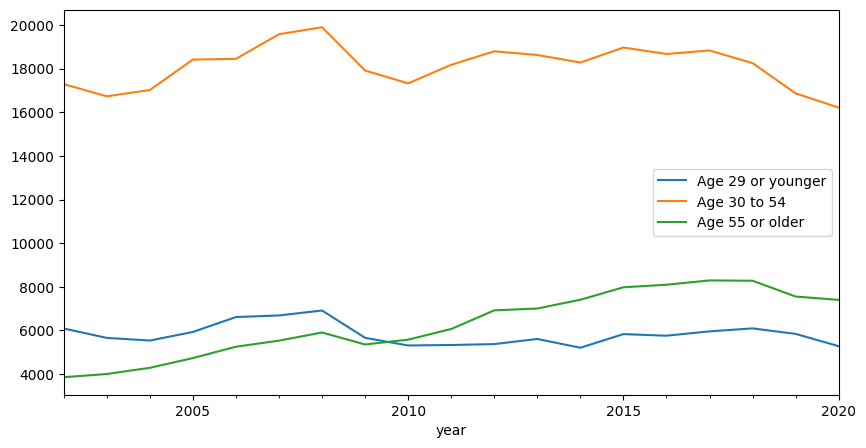

In [91]:
fig, ax = plt.subplots(figsize= (10,5))
#work_count.plot(y="Total All Jobs", x="year", ax=ax)
work_count.plot(y='Age 29 or younger', x="year", ax=ax)
work_count.plot(y='Age 30 to 54', x="year", ax=ax)
work_count.plot(y='Age 55 or older', x="year", ax=ax)
fig.show()

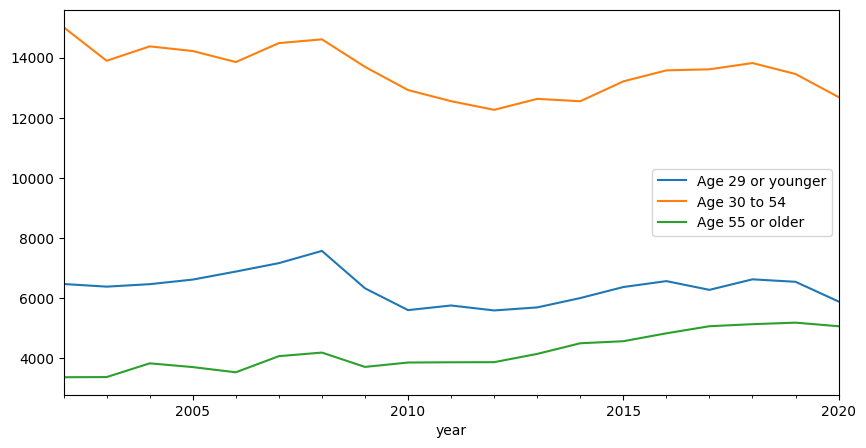

In [92]:
fig, ax = plt.subplots(figsize= (10,5))
#home_count.plot(y="Total All Jobs", x="year", ax=ax)
home_count.plot(y='Age 29 or younger', x="year", ax=ax)
home_count.plot(y='Age 30 to 54', x="year", ax=ax)
home_count.plot(y='Age 55 or older', x="year", ax=ax)
fig.show()

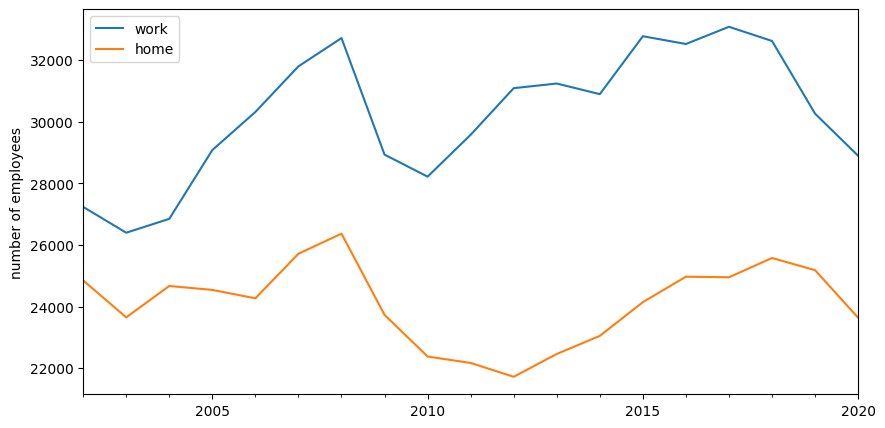

In [93]:
fig, ax = plt.subplots(figsize= (10,5))
work_count.plot(y="Total All Jobs", x="year", label="work", ax=ax)
home_count.plot(y="Total All Jobs", x="year",label="home", ax=ax)
ax.set_xlabel("")
ax.set_ylabel("number of employees")
fig.show()

In [94]:
work_count["YEAR"] = work_count["year"].dt.year

<ipython-input-94-00458ff0617a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_count["YEAR"] = work_count["year"].dt.year


In [95]:
work_count.dtypes

area                                                                         object
year                                                                 datetime64[ns]
type                                                                         object
Total All Jobs                                                                int64
Age 29 or younger                                                           float64
Age 30 to 54                                                                float64
Age 55 or older                                                             float64
$1,250 per month or less                                                    float64
$1,251 to $3,333 per month                                                  float64
More than $3,333 per month                                                  float64
Agriculture, Forestry, Fishing and Hunting                                  float64
Mining, Quarrying, and Oil and Gas Extraction                               

In [96]:
# -- import statmodels using the formula api
import statsmodels.formula.api as sm

# -- first build the model
model = sm.ols("Q('Age 30 to 54') ~ YEAR", data=work_count)

# -- now fit the model to the data
result = model.fit()


# -- summarize the model fit
print(result.summary())

pred=result.predict(work_count)


                            OLS Regression Results                            
Dep. Variable:      Q('Age 30 to 54')   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                  0.001072
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.974
Time:                        02:18:58   Log-Likelihood:                -157.40
No. Observations:                  19   AIC:                             318.8
Df Residuals:                      17   BIC:                             320.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.091e+04   8.53e+04      0.245      0.8

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [97]:
pred

0     18104.494737
2     18105.884211
4     18107.273684
6     18108.663158
8     18110.052632
10    18111.442105
12    18112.831579
14    18114.221053
16    18115.610526
18    18117.000000
20    18118.389474
22    18119.778947
24    18121.168421
26    18122.557895
28    18123.947368
30    18125.336842
32    18126.726316
34    18128.115789
36    18129.505263
dtype: float64

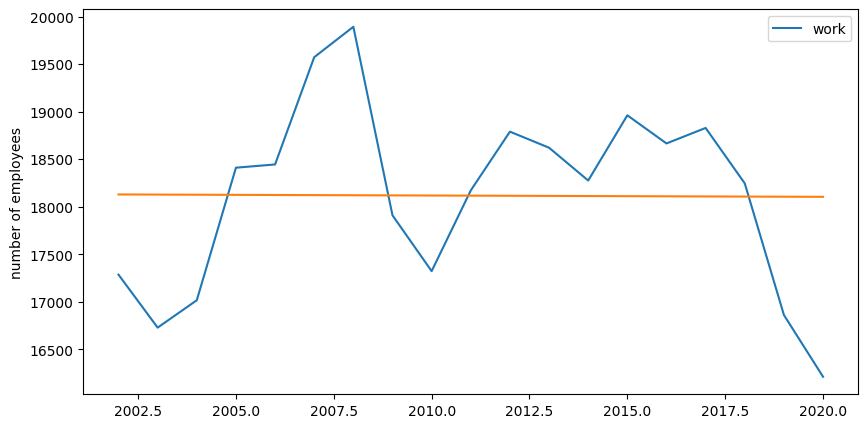

In [98]:
fig, ax = plt.subplots(figsize= (10,5))
work_count.plot(y="Age 30 to 54", x="YEAR", label="work", ax=ax)
ax.plot(work_count["YEAR"], pred)
ax.set_xlabel("")
ax.set_ylabel("number of employees")
fig.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                              OLS Regression Results                              
Dep. Variable:     Q('Age 29 or younger')   R-squared:                       0.087
Model:                                OLS   Adj. R-squared:                  0.034
Method:                     Least Squares   F-statistic:                     1.628
Date:                    Thu, 28 Sep 2023   Prob (F-statistic):              0.219
Time:                            02:18:59   Log-Likelihood:                -143.21
No. Observations:                      19   AIC:                             290.4
Df Residuals:                          17   BIC:                             292.3
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

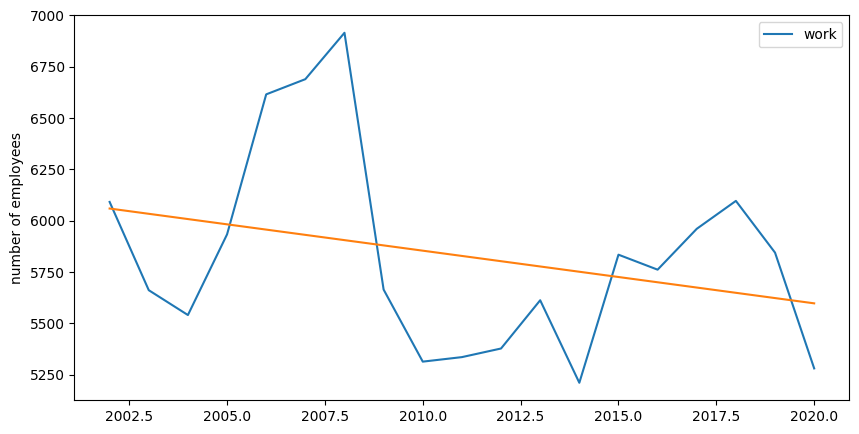

In [99]:
# -- first build the model
model = sm.ols("Q('Age 29 or younger') ~ YEAR", data=work_count)

# -- now fit the model to the data
result = model.fit()


# -- summarize the model fit
print(result.summary())

pred=result.predict(work_count)

fig, ax = plt.subplots(figsize= (10,5))
work_count.plot(y="Age 29 or younger", x="YEAR", label="work", ax=ax)
ax.plot(work_count["YEAR"], pred)
ax.set_xlabel("")
ax.set_ylabel("number of employees")
fig.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                             OLS Regression Results                             
Dep. Variable:     Q('Age 55 or older')   R-squared:                       0.896
Model:                              OLS   Adj. R-squared:                  0.890
Method:                   Least Squares   F-statistic:                     147.2
Date:                  Thu, 28 Sep 2023   Prob (F-statistic):           8.52e-10
Time:                          02:18:59   Log-Likelihood:                -143.69
No. Observations:                    19   AIC:                             291.4
Df Residuals:                        17   BIC:                             293.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.97e+05   4.15e+04

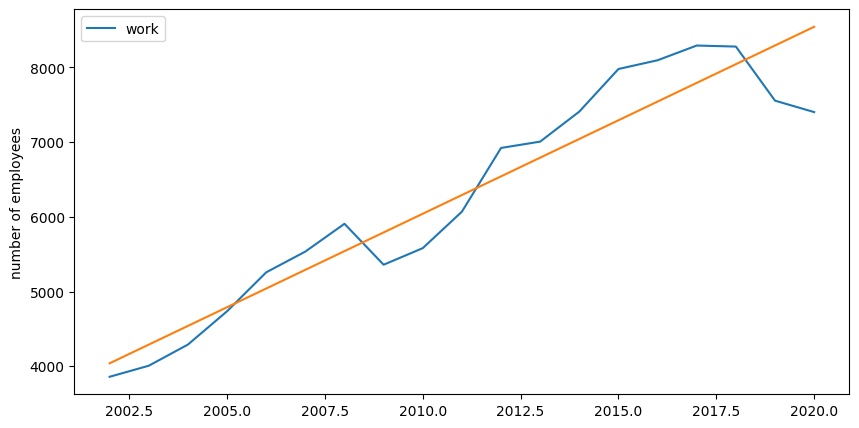

In [100]:
# -- first build the model
model = sm.ols("Q('Age 55 or older') ~ YEAR", data=work_count)
# -- now fit the model to the data
result = model.fit()
# -- summarize the model fit
print(result.summary())
pred=result.predict(work_count)

fig, ax = plt.subplots(figsize= (10,5))
work_count.plot(y="Age 55 or older", x="YEAR", label="work", ax=ax)
ax.plot(work_count["YEAR"], pred)
ax.set_xlabel("")
ax.set_ylabel("number of employees")
fig.show()

<ipython-input-102-0fbab3fa814b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_count["YEAR"] = home_count["year"].dt.year
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                             OLS Regression Results                             
Dep. Variable:     Q('Age 55 or older')   R-squared:                       0.853
Model:                              OLS   Adj. R-squared:                  0.844
Method:                   Least Squares   F-statistic:                     98.75
Date:                  Thu, 28 Sep 2023   Prob (F-statistic):           1.70e-08
Time:                          02:20:57   Log-Likelihood:                -130.16
No. Observations:                    19   AIC:                             264.3
Df Residuals:                        17   BIC:                             266.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.98e+05   2.03e+04

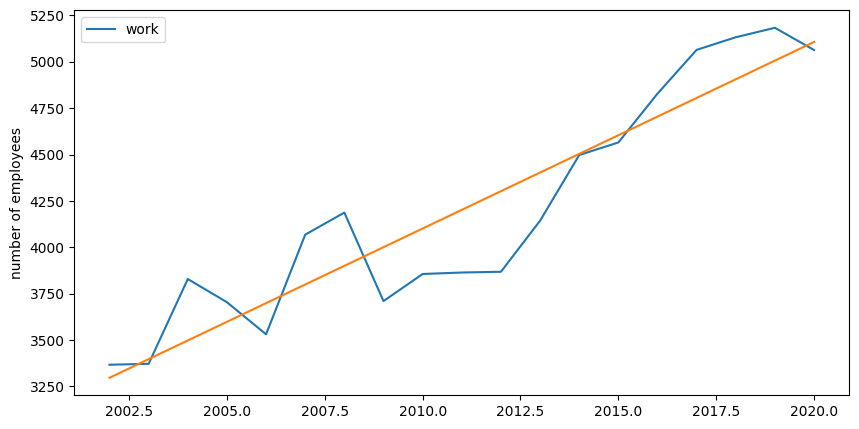

In [102]:
home_count["YEAR"] = home_count["year"].dt.year
# -- first build the model
model = sm.ols("Q('Age 55 or older') ~ YEAR", data=home_count)
# -- now fit the model to the data
result = model.fit()
# -- summarize the model fit
print(result.summary())
pred=result.predict(work_count)

fig, ax = plt.subplots(figsize= (10,5))
home_count.plot(y="Age 55 or older", x="YEAR", label="work", ax=ax)
ax.plot(home_count["YEAR"], pred)
ax.set_xlabel("")
ax.set_ylabel("number of employees")
fig.show()

<ipython-input-105-f45e57853336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_count["YEAR"] = home_count["year"].dt.year
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:      Q('Age 30 to 54')   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     9.077
Date:                Thu, 28 Sep 2023   Prob (F-statistic):            0.00784
Time:                        02:25:41   Log-Likelihood:                -149.24
No. Observations:                  19   AIC:                             302.5
Df Residuals:                      17   BIC:                             304.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.809e+05   5.55e+04      3.257      0.0

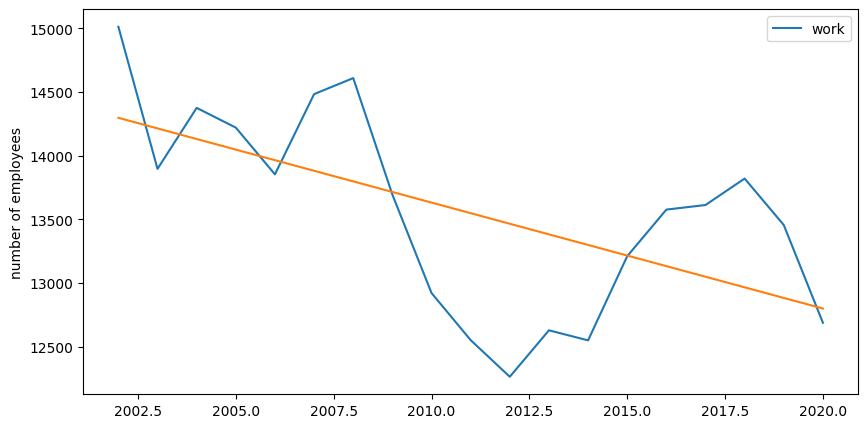

In [105]:
home_count["YEAR"] = home_count["year"].dt.year
# -- first build the model
model = sm.ols("Q('Age 30 to 54') ~ YEAR", data=home_count)
# -- now fit the model to the data
result = model.fit()
# -- summarize the model fit
print(result.summary())
pred=result.predict(home_count)

fig, ax = plt.subplots(figsize= (10,5))
home_count.plot(y="Age 30 to 54", x="YEAR", label="work", ax=ax)
ax.plot(home_count["YEAR"], pred)
ax.set_xlabel("")
ax.set_ylabel("number of employees")
fig.show()

<ipython-input-104-0fcd8798afb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_count["YEAR"] = work_count["year"].dt.year
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:      Q('Age 30 to 54')   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                  0.001072
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.974
Time:                        02:25:16   Log-Likelihood:                -157.40
No. Observations:                  19   AIC:                             318.8
Df Residuals:                      17   BIC:                             320.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.091e+04   8.53e+04      0.245      0.8

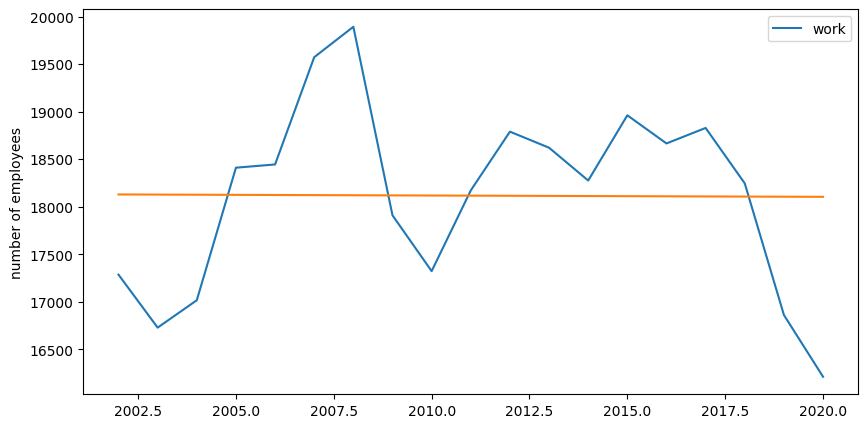

In [104]:
work_count["YEAR"] = work_count["year"].dt.year
# -- first build the model
model = sm.ols("Q('Age 30 to 54') ~ YEAR", data=work_count)
# -- now fit the model to the data
result = model.fit()
# -- summarize the model fit
print(result.summary())
pred=result.predict(work_count)

fig, ax = plt.subplots(figsize= (10,5))
work_count.plot(y="Age 30 to 54", x="YEAR", label="work", ax=ax)
ax.plot(work_count["YEAR"], pred)
ax.set_xlabel("")
ax.set_ylabel("number of employees")
fig.show()